<a href="https://colab.research.google.com/github/charliecurnin/clone-compress/blob/master/clone_compress_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from IPython.display import Audio
import json
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from scipy.io import wavfile

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Explore dataset (some code adapted from HW3)

In [17]:
HVB_PATH = '/content/gdrive/MyDrive/cs224s_spring2022/data/harpervalleybank'
os.listdir(HVB_PATH)

agent_audio_path = os.path.join(HVB_PATH, 'audio/agent')
caller_audio_path = os.path.join(HVB_PATH, 'audio/caller')
transcript_path = os.path.join(HVB_PATH, 'transcript')
metadata_path = os.path.join(HVB_PATH, 'metadata')

get_files = lambda dir : [os.path.join(dir, f) for f in os.listdir(dir)]

Number of conversations

In [7]:
print(len(os.listdir(agent_audio_path)))

1446


Total audio length

Total duration:  84132.95000000008


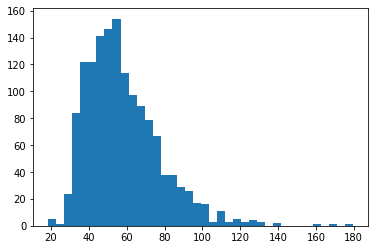

In [18]:
def get_duration(wav): 
  sr, data = wavfile.read(wav)
  return len(data) / sr

durations = [get_duration(f) for f in get_files(agent_audio_path)]
total_duration = sum(durations)
print("Total duration: ", total_duration)
plt.hist(durations, bins='auto')
plt.show()

What if we remove silence? (For cloning, need information about speaker speaking.)

Avg duration without silence:  35.662183219954656


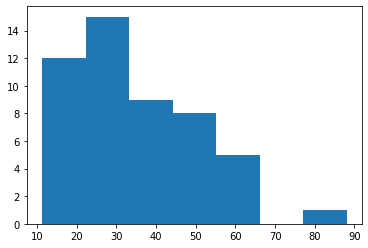

In [53]:
def remove_silence(wav):
    speech_intervals = librosa.effects.split(wav)
    wav = np.concatenate([
      wav[start_i:end_i] for (start_i, end_i) in speech_intervals
    ])
    return wav
  
def get_duration_no_silence(wav):
    data, sr = librosa.load(wav)
    no_sil = remove_silence(data)
    return len(no_sil) / sr


agent_samples = random.sample(get_files(agent_audio_path), 50)    # sample so this isn't so slow
durations = [get_duration_no_silence(f) for f in agent_samples]
print("Avg duration without silence: ", sum(durations) / len(durations))
plt.hist(durations, bins='auto')
plt.show()

How big should we expect our transcripts to be? How many words are spoken in each conversation?

Average n words:  101.55809128630706


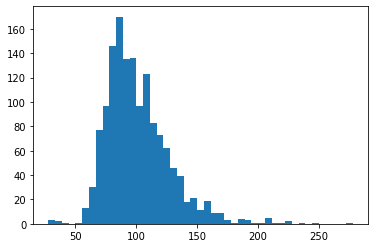

In [51]:
NOT_WORDS = ["[", "]", "<", ">"]

def get_n_words(transcript_f):
  n_words = 0
  for segment in json.load(open(transcript_f)):
    segment_words = [w for w in word_tokenize(segment["human_transcript"]) if w not in NOT_WORDS]
    n_words += len(segment_words)
  return n_words

n_words = [get_n_words(f) for f in get_files(transcript_path)]
print("Average n words: ", sum(n_words) / len(n_words))
plt.hist(n_words, bins='auto')
plt.show()